In [1]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
local_crs = 32636
example_data_path = "./data"

from blocksnet.models import City

from blocksnet.models import City
city_model = City.from_pickle(os.path.join(example_data_path, 'city_model.pickle'))

In [2]:

city_model = City.from_pickle(os.path.join(example_data_path, 'city_model.pickle'))
points = gpd.read_file(os.path.join(example_data_path, "points_centr.geojson")).to_crs(local_crs)
points

city_service_type    id                        geometry
0                    Почта     0  POINT (344978.111 6649514.697)
1                    Почта     1  POINT (345942.044 6648924.131)
2            Почтовый ящик     3  POINT (345906.721 6647296.091)
3            Почтовый ящик     4  POINT (343179.633 6648665.945)
4            Почтовый ящик     5  POINT (344307.350 6648373.078)
...                    ...   ...                             ...
1309  Товары для праздника  1941  POINT (346684.731 6648331.524)
1310  Товары для праздника  1942  POINT (346284.192 6645938.198)
1311                 Цветы  1973  POINT (346525.966 6648569.467)
1312                 Цветы  1976  POINT (347170.022 6647756.403)
1313                 Цветы  1980  POINT (347802.928 6648693.223)

[1314 rows x 3 columns]

In [3]:
from blocksnet.method import Connectivity
city_model = City.from_pickle(os.path.join(example_data_path, 'city_model.pickle'))
conn = Connectivity(city_model=city_model)
polygons = conn.calculate()
polygons 


geometry  median
id                                                             
0     POLYGON ((344943.719 6647610.514, 344959.205 6...    30.2
1     POLYGON ((344968.687 6647544.000, 344971.625 6...    30.2
2     POLYGON ((344929.592 6647257.521, 344931.964 6...    30.5
3     POLYGON ((344840.676 6647432.974, 344853.943 6...    31.3
4     POLYGON ((344856.398 6647391.171, 344900.097 6...    31.3
...                                                 ...     ...
1349  POLYGON ((346243.206 6647701.284, 346243.206 6...    23.7
1350  POLYGON ((347483.986 6647345.029, 347483.627 6...    19.0
1351  POLYGON ((347463.977 6647381.345, 347456.841 6...    18.8
1352  POLYGON ((344028.826 6648834.242, 344112.884 6...    27.9
1353  POLYGON ((344421.844 6648904.751, 344398.071 6...    25.5

[1354 rows x 2 columns]

In [4]:
from blocksnet.method import CentralPlace
central = CentralPlace(city_model=city_model)


In [5]:
polygons_ct = central.centrality(points=points)
polygons_ct.sort_values(by='centrality', ascending=False)


/var/folders/h8/0wmx2zx90bn60jw8zc1r4qjc0000gn/T/ipykernel_5317/4172184923.py:1: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  polygons_ct = central.centrality(points=points)


geometry  median  density  \
id                                                                        
218  POLYGON ((347931.427 6648093.691, 347931.410 6...    21.2       36   
84   POLYGON ((345399.731 6648295.709, 345407.371 6...    24.6       32   
216  POLYGON ((347891.811 6647669.302, 347891.810 6...    22.9       37   
217  POLYGON ((347990.349 6648195.397, 348046.610 6...    22.7       43   
98   POLYGON ((345641.699 6649086.934, 345652.338 6...    22.5       13   
..                                                 ...     ...      ...   
915  POLYGON ((344873.206 6647721.783, 344868.036 6...    30.2        1   
271  POLYGON ((349076.900 6648227.518, 349077.479 6...    30.8        1   
861  POLYGON ((349369.906 6648376.453, 349371.154 6...    34.5        3   
884  POLYGON ((342514.977 6648439.699, 342381.022 6...    34.2        1   
858  POLYGON ((349444.596 6648263.706, 349447.949 6...    34.5        1   

      shannon  centrality  
id                         
218  2.120593    2.586271  
84   2.209407    2.409524  
216  1.839301    2.274496  
217  1.498285    2.118183  
98   2.138397    1.992864  
..        ...         ...  
915 -0.000000   -0.595238  
271 -0.000000   -0.623810  
861 -0.000000   -0.752381  
884 -0.000000   -0.785714  
858 -0.000000   -0.800000  

[193 rows x 5 columns]

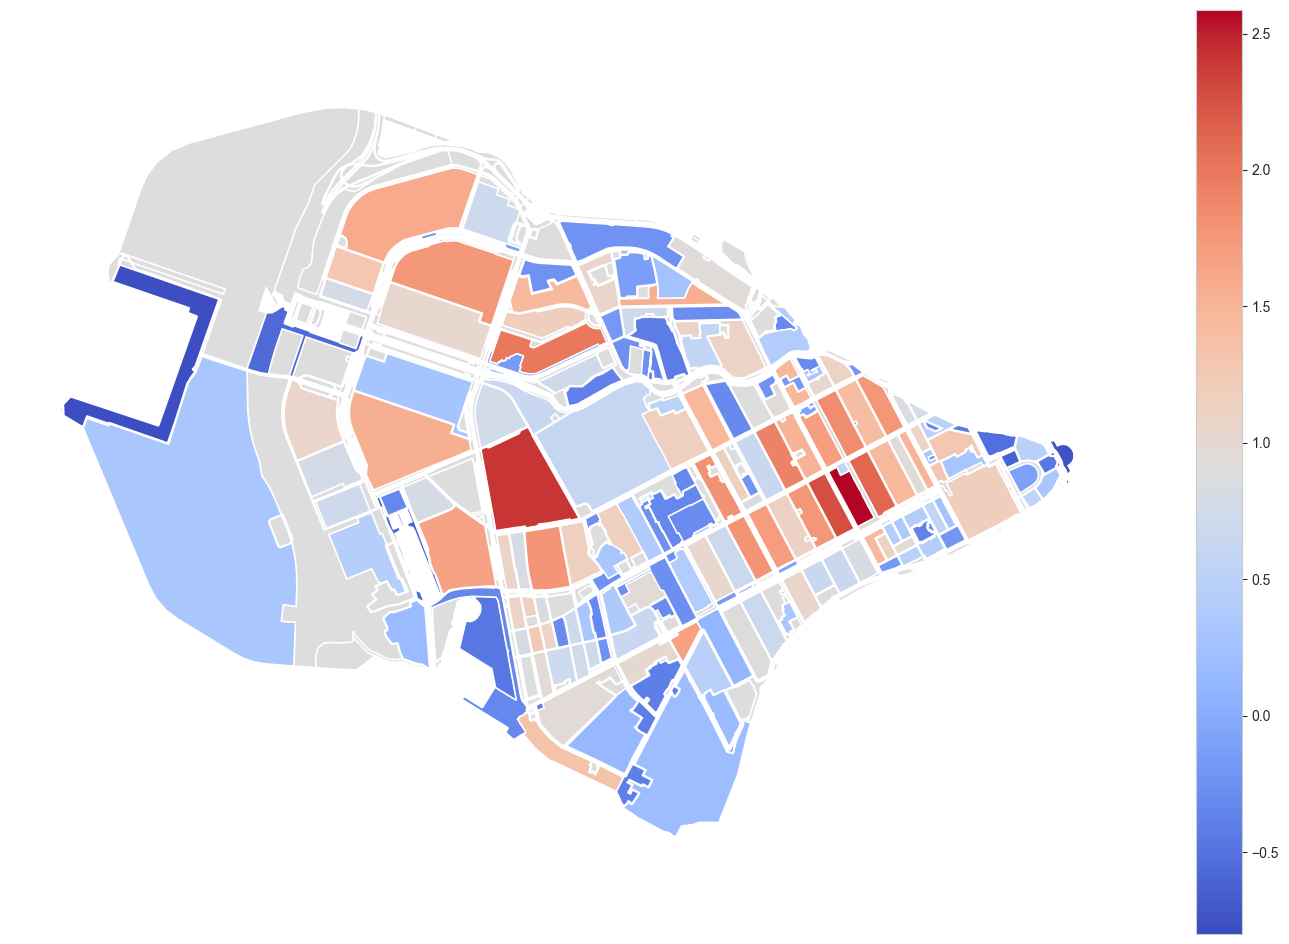

In [6]:
plt.figure(figsize=(18, 12))  
polygons.plot(ax=plt.gca(), color="#ddd", alpha=1)
polygons_ct.plot(ax=plt.gca(), column='centrality', legend=True, cmap='coolwarm')
plt.gca().set_axis_off()
plt.show()